# **1. Preparación**

In [ ]:
# Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Cargar los archivos .xlsx
path_demograficos = 'data/Demograficos.xlsx'
path_historico = 'data/HistoricoNotas.xlsx'


# Leer los archivos en dataframes
df_demograficos = pd.read_excel(path_demograficos)
df_historico = pd.read_excel(path_historico)

# **2. Entendimiento de los conjuntos de datos**

In [ ]:
# Mostrar las primeras filas de cada dataframe para revisar los datos
print("Primeras filas de Demograficos:")
print(df_demograficos.head())

Primeras filas de Demograficos:
  PERIODO_ACAENICO       CODIGO                        UNIDAD  CODIGOPROGRAMA  \
0         2017 - 2  53212132001  ESCUELA NACIONAL DEL DEPORTE           53212   
1         2017 - 2   7306132001  ESCUELA NACIONAL DEL DEPORTE            7306   
2         2017 - 2   7306131002  ESCUELA NACIONAL DEL DEPORTE            7306   
3         2017 - 2  53212162577  ESCUELA NACIONAL DEL DEPORTE           53212   
4         2017 - 2  53212171151  ESCUELA NACIONAL DEL DEPORTE           53212   

       PROGRAMA  SEMESTRE  PROMEDIOSEMESTRE     GENERO FECHANACIMIENTO  \
0       DEPORTE         8               4.4  Masculino      02-04-1996   
1  FISIOTERAPIA         8               3.3   Femenino      01-08-1990   
2  FISIOTERAPIA        10               4.5   Femenino      14-08-1994   
3       DEPORTE         3               3.4  Masculino      15-07-1997   
4       DEPORTE         2               3.6  Masculino      24-03-1999   

   ESTRATO  ... IDDEPARTAMENTONACIMI

In [ ]:
print("\nPrimeras filas de HistoricoNotas:")
print(df_historico.head())


Primeras filas de HistoricoNotas:
    CODIGO                                       CURSO    Nota_Definitiva  \
0  9010602  E.C I (NEGOCIACIÓN Y MANEJO DE CONFLICTOS)                  A   
1    90106                   ELECTIVA COMPLEMENTARIA I  5.0 - CINCO. CERO   
2  9020601    E.C. II (LIDERAZGO Y TOMA DE DECISIONES)                  A   
3  9020601    E.C. II (LIDERAZGO Y TOMA DE DECISIONES)                  A   
4  9020601    E.C. II (LIDERAZGO Y TOMA DE DECISIONES)                  A   

  Aprobado  Creditos Periodo  Semestre Cuenta para Promedio        TIPO  \
0       SI         2  2018-2         1                   NO      NORMAL   
1       SI         2  2018-2         1                   NO      NORMAL   
2       SI         2  2019-1         2                   NO      NORMAL   
3       SI         2  2020-1         2                   NO      NORMAL   
4       SI         2  2020-1         2                   NO  VALIDACIÓN   

  CODIGOMATRICULA              PENSUM              

In [ ]:
# Analizar las columnas y tamaños de los datasets
print("\nColumnas de Demograficos:", df_demograficos.columns)
print("Tamaño de Demograficos:", df_demograficos.shape)


Columnas de Demograficos: Index(['PERIODO_ACAENICO', 'CODIGO', 'UNIDAD', 'CODIGOPROGRAMA', 'PROGRAMA',
       'SEMESTRE', 'PROMEDIOSEMESTRE', 'GENERO', 'FECHANACIMIENTO', 'ESTRATO',
       'CIUDADRESIDENCIA', 'DEPARTAMENTORESICEDENCIA', 'ESTADOCIVIL',
       'PROMEDIOGENERAL', 'SITUACION_ACTUAL', 'CATEGORIA_ACTUAL',
       'SITUACION_DEL_PERIODO', 'CATEGORIA_DEL_PERIODO', 'DISCAPACIDAD',
       'TIPO_DISCAPACIDAD', 'FECHA_MATRICULA', 'IDCIUDADNACIMIENTO',
       'CIUDADNACIMIENTO', 'IDDEPARTAMENTONACIMIENTO',
       'DEPARTAMENTONACIMIENTO', 'SISBEN', 'NIVELSISBEN', 'CANTIDAD',
       'PERIODO', 'EDAD2', 'EDAD', 'FACULTAD', 'NIVEL_FORMACION'],
      dtype='object')
Tamaño de Demograficos: (55419, 33)


In [ ]:
print("\nColumnas de HistoricoNotas:", df_historico.columns)
print("Tamaño de HistoricoNotas:", df_historico.shape)


Columnas de HistoricoNotas: Index(['CODIGO', 'CURSO', 'Nota_Definitiva', 'Aprobado', 'Creditos', 'Periodo',
       'Semestre', 'Cuenta para Promedio', 'TIPO', 'CODIGOMATRICULA', 'PENSUM',
       'PROGRAMA'],
      dtype='object')
Tamaño de HistoricoNotas: (418031, 12)


In [ ]:
# Identificar columnas en común para realizar el join
columnas_comunes = df_demograficos.columns.intersection(df_historico.columns)
print("\nColumnas comunes entre los dos datasets:", columnas_comunes)


Columnas comunes entre los dos datasets: Index(['CODIGO', 'PROGRAMA'], dtype='object')


Podemos realizar un análisis inicial para verificar qué porcentaje de los estudiantes presentes en el conjunto de datos de Demograficos también se encuentran en el conjunto de HistoricoNotas, utilizando la columna común CODIGO

In [ ]:
# Calcular que pocentaje de los estudiantes estan tanto en Demograficos como HistoricoNotas de acuerdo a su codigo

codigos_demograficos = set(df_demograficos['CODIGO'])
codigos_historico = set(df_historico['CODIGO'])

codigos_comunes = codigos_demograficos.intersection(codigos_historico)

porcentaje_comunes = (len(codigos_comunes) / len(codigos_demograficos)) * 100

print(f"El porcentaje de estudiantes presentes tanto en Demograficos como en HistoricoNotas es: {porcentaje_comunes:.2f}%")


El porcentaje de estudiantes presentes tanto en Demograficos como en HistoricoNotas es: 0.00%


El análisis inicial muestra que el porcentaje de estudiantes presentes tanto en el dataset de Demograficos como en el de HistoricoNotas es 0.00%. Esto sugiere que el dataframe de HistoricoNotas no incluye el ID del estudiante (CODIGO) en los resultados de notas, lo cual complica significativamente el análisis. Sin esta información, no es posible vincular el historial académico de los estudiantes con sus datos demográficos, lo que habría sido fundamental para analizar la progresión de sus notas a lo largo del tiempo. Este tipo de análisis habría permitido identificar posibles patrones de riesgo de deserción académica, observando si un estudiante muestra un descenso continuo en su rendimiento.



Para visualizar cómo los CODIGOS de ambos datasets pertenecen a rangos completamente diferentes, podemos graficar la distribución de los CODIGOS (excluyendo aquellos que contienen caracteres no numéricos, como letras) para resaltar las discrepancias.

<ipython-input-99-b287d1f0894f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demograficos_filtrado['CODIGO'] = df_demograficos_filtrado['CODIGO'].astype(int)
<ipython-input-99-b287d1f0894f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_historico_filtrado['CODIGO'] = df_historico_filtrado['CODIGO'].astype(int)
<ipython-input-99-b287d1f0894f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legen

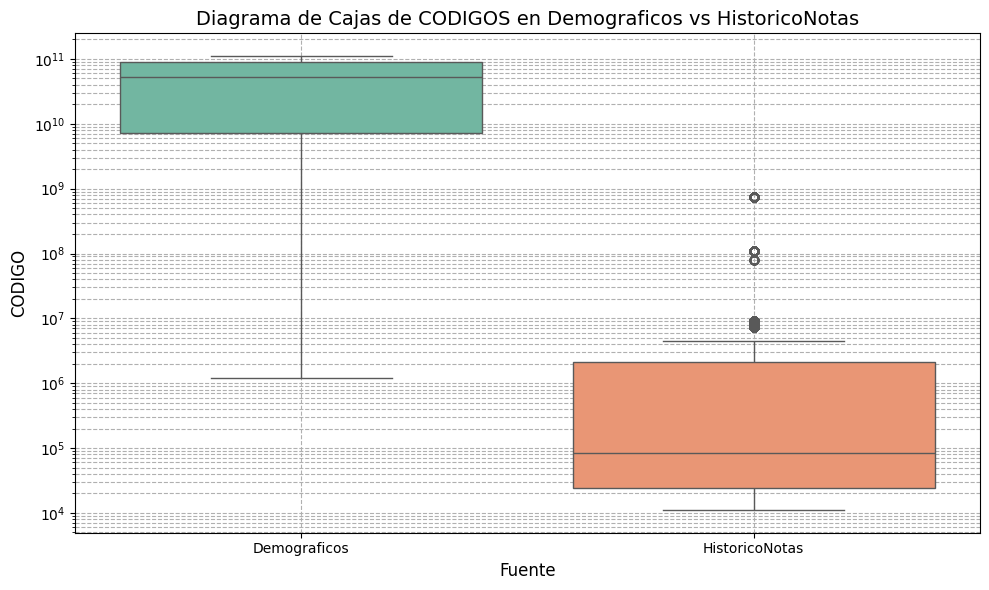

In [ ]:
# Filtrar los CODIGOS que solo son numéricos para ambos dataframes
df_demograficos_filtrado = df_demograficos[df_demograficos['CODIGO'].apply(lambda x: str(x).isdigit())]
df_historico_filtrado = df_historico[df_historico['CODIGO'].apply(lambda x: str(x).isdigit())]

# Convertir a numérico para facilidad de manejo
df_demograficos_filtrado['CODIGO'] = df_demograficos_filtrado['CODIGO'].astype(int)
df_historico_filtrado['CODIGO'] = df_historico_filtrado['CODIGO'].astype(int)

# Crear un nuevo DataFrame que combine los datos para el boxplot
df_combined = pd.DataFrame({
    'CODIGO': pd.concat([df_demograficos_filtrado['CODIGO'], df_historico_filtrado['CODIGO']]),
    'Fuente': ['Demograficos'] * len(df_demograficos_filtrado) + ['HistoricoNotas'] * len(df_historico_filtrado)
})

# Crear el diagrama de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuente', y='CODIGO', data=df_combined, palette='Set2')

# Personalizar el gráfico
plt.title('Diagrama de Cajas de CODIGOS en Demograficos vs HistoricoNotas', fontsize=14)
plt.xlabel('Fuente', fontsize=12)
plt.ylabel('CODIGO', fontsize=12)
plt.yscale('log')  # Usar escala logarítmica en el eje Y
plt.grid(True, which="both", ls="--")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En el análisis de los datos, se prestará especial atención al dataframe de Demográficos, ya que contiene información esencial del estudiante, como el programa académico, el promedio, la situación académica, la situación social y el lugar de residencia. Esta información es fundamental para desarrollar un modelo de predicción que identifique a los estudiantes con mayor riesgo de deserción.

Aunque hubiera sido valioso contar con el historial de notas de cada estudiante, ya que un descenso constante en el promedio podría ser una fuerte señal de alerta para identificar un estudiante cerca a desertar, aún existe la posibilidad de integrar estos datos en el futuro. Si se obtiene información sobre cómo relacionar el código del estudiante con el código de matrícula de cada curso, se podría acceder al historial de notas, lo que enriquecería aún más el análisis y las predicciones.

# **3. Exploración Dataset Demografico**

## **3.1. Análisis de Calidad de Datos**

### **3.1.1. Completitud**

La completitud se refiere a la proporción de valores faltantes en cada columna del dataframe. Se calculará el porcentaje de valores faltantes en cada columna y se sugerirán estrategias de imputación.

In [ ]:
# Completitud
missing_data = df_demograficos.isnull().mean() * 100
missing_data_summary = missing_data[missing_data >= 0].sort_values(ascending=False)

# Formatea los valores como un porcentaje
missing_data_summary = missing_data_summary.apply(lambda x: f'{x:.2f}%')

# Imprimir resumen de valores faltantes
print("Porcentaje de valores faltantes en cada columna:")
print(missing_data_summary)


Porcentaje de valores faltantes en cada columna:
NIVELSISBEN                 76.97%
CIUDADRESIDENCIA             1.68%
DEPARTAMENTORESICEDENCIA     1.68%
IDCIUDADNACIMIENTO           0.49%
CIUDADNACIMIENTO             0.49%
IDDEPARTAMENTONACIMIENTO     0.49%
DEPARTAMENTONACIMIENTO       0.49%
ESTADOCIVIL                  0.19%
SISBEN                       0.07%
ESTRATO                      0.03%
DISCAPACIDAD                 0.01%
FECHANACIMIENTO              0.00%
TIPO_DISCAPACIDAD            0.00%
FECHA_MATRICULA              0.00%
CANTIDAD                     0.00%
PERIODO                      0.00%
EDAD2                        0.00%
EDAD                         0.00%
FACULTAD                     0.00%
PERIODO_ACAENICO             0.00%
SITUACION_DEL_PERIODO        0.00%
CATEGORIA_DEL_PERIODO        0.00%
CODIGO                       0.00%
CATEGORIA_ACTUAL             0.00%
SITUACION_ACTUAL             0.00%
PROMEDIOGENERAL              0.00%
GENERO                       0.00%
PROMED

En general, la completitud del dataframe es aceptable para la mayoría de las columnas, ya que se observan porcentajes de valores faltantes relativamente bajos en varias de ellas. Sin embargo, se destaca que la columna NIVELSISBEN tiene un 76.97% de valores faltantes, lo que implica que solo está registrada para un cuarto de los estudiantes. Dada esta alta tasa de ausencia, sería prudente no incluir esta columna en el análisis, ya que podría sesgar los resultados.

Para las demás columnas, donde los porcentajes de valores faltantes son relativamente bajos, se sugieren las siguientes estrategias de imputación:

  * Columnas numéricas (ej. ESTRATO,): Se recomienda la imputación con la media o mediana, dependiendo de la distribución de los datos. La media es adecuada si los datos no tienen outliers, mientras que la mediana es preferible si los datos son sesgados.

  * Columnas categóricas (ej. ESTADOCIVIL, DISCAPACIDAD): Se sugiere imputar con la moda, que representa el valor más común en la columna.

  * Fechas (ej. FECHANACIMIENTO): Se podrían imputar con una fecha promedio o con la fecha más común, pero en muchos casos, puede ser mejor dejarlas como están.

In [ ]:
# Imputar columnas numéricas con la media o mediana
numerical_columns = ['ESTRATO']
for col in numerical_columns:
    if df_demograficos[col].isnull().mean() < 0.5:  # Solo si hay menos del 50% de datos faltantes
        mean_value = df_demograficos[col].mean()  # Calcular la media
        df_demograficos[col].fillna(mean_value, inplace=True)  # Imputar con la media

# Imputar columnas categóricas con la moda
categorical_columns = ['ESTADOCIVIL', 'DISCAPACIDAD', 'TIPO_DISCAPACIDAD', 'CIUDADRESIDENCIA', 'DEPARTAMENTORESICEDENCIA']
for col in categorical_columns:
    if df_demograficos[col].isnull().mean() < 0.05:  # Solo si hay menos del 5% de datos faltantes
        mode_value = df_demograficos[col].mode()[0]  # Calcular la moda
        df_demograficos[col].fillna(mode_value, inplace=True)  # Imputar con la moda

# Mostrar el porcentaje de valores faltantes después de la imputación
missing_data_after_imputation = df_demograficos.isnull().mean() * 100

# Formatear el porcentaje
missing_data_after_imputation = missing_data_after_imputation.apply(lambda x: f'{x:.2f}%')

print("\nPorcentaje de valores faltantes después de la imputación:")
print(missing_data_after_imputation)



Porcentaje de valores faltantes después de la imputación:
PERIODO_ACAENICO             0.00%
CODIGO                       0.00%
UNIDAD                       0.00%
CODIGOPROGRAMA               0.00%
PROGRAMA                     0.00%
SEMESTRE                     0.00%
PROMEDIOSEMESTRE             0.00%
GENERO                       0.00%
FECHANACIMIENTO              0.00%
ESTRATO                      0.00%
CIUDADRESIDENCIA             0.00%
DEPARTAMENTORESICEDENCIA     0.00%
ESTADOCIVIL                  0.00%
PROMEDIOGENERAL              0.00%
SITUACION_ACTUAL             0.00%
CATEGORIA_ACTUAL             0.00%
SITUACION_DEL_PERIODO        0.00%
CATEGORIA_DEL_PERIODO        0.00%
DISCAPACIDAD                 0.00%
TIPO_DISCAPACIDAD            0.00%
FECHA_MATRICULA              0.00%
IDCIUDADNACIMIENTO           0.49%
CIUDADNACIMIENTO             0.49%
IDDEPARTAMENTONACIMIENTO     0.49%
DEPARTAMENTONACIMIENTO       0.49%
SISBEN                       0.07%
NIVELSISBEN                 76.

<ipython-input-101-9236bd01c43f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_demograficos[col].fillna(mean_value, inplace=True)  # Imputar con la media
<ipython-input-101-9236bd01c43f>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

### **3.1.2. Precisión**

La precisión se refiere a la exactitud y especificidad de los datos. En este caso, compararemos la columna edad, que contiene rangos, con la columna edad2, que tiene valores numéricos claros.

In [ ]:
# Muestra los valores que toman las columanas  EDAD y EDAD 2

print("Valores únicos de la columna EDAD:")
print(df_demograficos['EDAD'].unique())

print("\nValores únicos de la columna EDAD2:")
print(df_demograficos['EDAD2'].unique())


Valores únicos de la columna EDAD:
['Edad entre 18 y 25 años' 'Edad entre 26 y 33 años'
 'Edad entre 15 y 17 años' 'Edad mayor a 34 años']

Valores únicos de la columna EDAD2:
[ 21  27  23  20  18  22  28  19  17  24  30  25  26  36  40  33  48  57
  31  39  42  34  29  38  45  41  32  35  55  37  64  44  46  52  49  47
  16  53  54  43  50  67  65  58  15  51  56  68  62  69  63  59 119  60
 120  66  61]


Análisis:

  * La columna edad presenta datos como rangos (ej. "18-25"), lo que reduce la precisión y la capacidad de análisis.
  * La columna edad2 proporciona valores numéricos claros, lo que permite realizar cálculos precisos y análisis más detallados (Tambien podemos ver que hay edades de 120 y 119, lo cual no es muy realista y tendrá que ser tratado al analizar datos anomalos)

### **3.1.3. integridad**

La integridad se refiere a la coherencia y validez de los datos. Se revisará si las columnas contienen tipos de datos apropiados y si las relaciones entre las columnas son consistentes.

* Fechas: Se verificará que las columnas de fechas (si existen) estén en un formato de fecha adecuado.

* Promedios: Se comprobará que los promedios estén en un rango lógico (0 a 100, por ejemplo).

In [ ]:
# Verifica que todos los PROMEDIOSEMESTRE y PROMEDIOGENERAL esten en eun rango de promedio entre 0,0 y 5,0 después de ser convertidos a números

def is_valid_average(value):
  """Verifica si un valor de promedio es válido (entre 0.0 y 5.0)."""
  try:
    numeric_value = float(value)
    return 0.0 <= numeric_value <= 5.0
  except (ValueError, TypeError):
    return False

# Filtra el DataFrame para incluir solo las filas donde PROMEDIOSEMESTRE
# y PROMEDIOGENERAL sean números válidos dentro del rango especificado.

df_demograficos_filtered = df_demograficos[
    df_demograficos['PROMEDIOSEMESTRE'].apply(is_valid_average) &
    df_demograficos['PROMEDIOGENERAL'].apply(is_valid_average)
]

# Imprimir los resultados
print(f"Número de filas con promedios válidos: {len(df_demograficos_filtered)}")

# Si el número de filas con promedios válidos es menor que el número total de filas
# en el DataFrame original, entonces hay filas con promedios inválidos.

if len(df_demograficos_filtered) < len(df_demograficos):
  print("Hay filas con promedios inválidos en el DataFrame.")
  # Puedes imprimir las filas con promedios inválidos si es necesario:
  # invalid_rows = df_demograficos[
  #     ~df_demograficos['PROMEDIOSEMESTRE'].apply(is_valid_average) |
  #     ~df_demograficos['PROMEDIOGENERAL'].apply(is_valid_average)
  # ]
  # print("Filas con promedios inválidos:\n", invalid_rows)
else:
  print("Todos los promedios son válidos.")


Número de filas con promedios válidos: 55419
Todos los promedios son válidos.


### **3.1.4. Consistencia**

La consistencia se refiere a la uniformidad de los datos en todo el dataframe. Se verificará si hay datos contradictorios o inconsistentes, como un estudiante que tiene una edad en el rango "18-25" y una edad2 de 30.

In [ ]:
# Verifica que la EDAD2 en efecto este en los rangos reportaods por la columna edad que son ['Edad entre 18 y 25 años' 'Edad entre 26 y 33 años'
#  'Edad entre 15 y 17 años' 'Edad mayor a 34 años']

import numpy as np

def check_age_consistency(row):
  """Verifica la consistencia entre EDAD y EDAD2."""
  edad = row['EDAD']
  edad2 = row['EDAD2']

  if edad == 'Edad entre 18 y 25 años':
    return 18 <= edad2 <= 25
  elif edad == 'Edad entre 26 y 33 años':
    return 26 <= edad2 <= 33
  elif edad == 'Edad entre 15 y 17 años':
    return 15 <= edad2 <= 17
  elif edad == 'Edad mayor a 34 años':
    return edad2 >= 34
  else:
    return True  # Si EDAD no es uno de los rangos definidos, se considera consistente


# Aplica la función a cada fila del DataFrame
df_demograficos['Edad Consistente'] = df_demograficos.apply(check_age_consistency, axis=1)


# Cuenta el número de filas donde EDAD y EDAD2 son consistentes
num_consistent_rows = df_demograficos['Edad Consistente'].sum()
total_rows = len(df_demograficos)

# Calcula el porcentaje de filas inconsistentes
percentage_inconsistent = (1 - (num_consistent_rows / total_rows)) * 100

# Imprime el porcentaje de filas inconsistentes
print(f"Porcentaje de filas con inconsistencia entre EDAD y EDAD2: {percentage_inconsistent:.2f}%")


# Puedes imprimir las filas inconsistentes para analizarlas más a fondo:
inconsistent_rows = df_demograficos[~df_demograficos['Edad Consistente']]
print("\nFilas con inconsistencia entre EDAD y EDAD2:")
print(inconsistent_rows[['EDAD', 'EDAD2']])


Porcentaje de filas con inconsistencia entre EDAD y EDAD2: 0.00%

Filas con inconsistencia entre EDAD y EDAD2:
Empty DataFrame
Columns: [EDAD, EDAD2]
Index: []


In [ ]:
# Verifica la consistencia entre las filas EDAD y FECHANACIMIENTO, revisando que la edad sea 2024 menos el año de nacimiento, excluyendo las fechas nan

import pandas as pd
import numpy as np

# Asegúrate de que la columna FECHANACIMIENTO sea de tipo datetime
df_demograficos['FECHANACIMIENTO'] = pd.to_datetime(df_demograficos['FECHANACIMIENTO'], errors='coerce')

# Filtra las filas que tengan valores válidos en ambas columnas
df_consistencia = df_demograficos.dropna(subset=['FECHANACIMIENTO', 'EDAD2'])

# Calcula la edad a partir de la fecha de nacimiento
df_consistencia['EdadCalculada'] = (pd.to_datetime('2024-01-01') - df_consistencia['FECHANACIMIENTO']).dt.days // 365

# Encuentra las filas donde la edad calculada difiere de la edad en la columna EDAD2
filas_inconsistentes = df_consistencia[df_consistencia['EdadCalculada'] != df_consistencia['EDAD2']]

# Imprime las filas inconsistentes
print("Filas inconsistentes entre EDAD2 y FECHANACIMIENTO:")
print(filas_inconsistentes[['FECHANACIMIENTO', 'EDAD2', 'EdadCalculada']])

# Puedes analizar las filas inconsistentes para determinar si hay errores en la columna EDAD2 o FECHANACIMIENTO.
# Por ejemplo, puedes decidir si actualizar la columna EDAD2 con la edad calculada o investigar la fuente de los datos.


Filas inconsistentes entre EDAD2 y FECHANACIMIENTO:
      FECHANACIMIENTO  EDAD2  EdadCalculada
0          1996-02-04     21             27
1          1990-01-08     27             34
5          1996-12-10     21             27
6          1995-12-01     22             28
7          1997-12-08     20             26
...               ...    ...            ...
55413      2001-09-09     18             22
55415      1999-11-10     21             24
55416      2000-02-03     20             23
55417      2001-01-09     18             22
55418      1998-03-03     22             25

[19340 rows x 3 columns]


<ipython-input-105-503f8595aad0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consistencia['EdadCalculada'] = (pd.to_datetime('2024-01-01') - df_consistencia['FECHANACIMIENTO']).dt.days // 365


A primera vista parece haber un fuerte problema de consistencia entre la fecha de nacimiento y la edad actual. No obstante, debemos recordar que estos se tratan de datos historicos, y en muchos de los casos se tienen registros de estudiantes ya retirados que not tiene sentido seguir actualizando, por lo que no se pondrá mucha atención a corregir este problema, y se seguirá trabajando con la edad reportada por el df.

## **3.2. Preparación de Datos**

Para desarrollar un modelo que pueda predecir si un estudiante está en riesgo de desertar, se han seleccionado las siguientes columnas como las más relevantes:

  1. SITUACION_ACTUAL: Esta variable es crucial ya que proporciona información directa sobre el estado del estudiante en relación con su desempeño académico. Un estudiante en riesgo podría estar en una situación académica desfavorable.

  2. PROGRAMA: Diferentes programas académicos pueden tener tasas de deserción variables. Comprender el programa al que pertenece un estudiante puede ofrecer información sobre su posible riesgo de deserción.

  3. PROMEDIO: Este es un indicador directo del rendimiento académico del estudiante. Un promedio bajo puede ser una señal de alerta para la deserción.

  4. ESTADOCIVIL: La situación personal de un estudiante puede influir en su capacidad para completar su educación. Por ejemplo, los estudiantes casados pueden tener diferentes responsabilidades que afectan su rendimiento académico.

  5. CIUDADRESIDENCIA: La ubicación geográfica del estudiante puede impactar su acceso a recursos educativos y apoyo, lo que a su vez puede influir en su tasa de deserción.

  6. SEMESTRE: El semestre actual puede ser un indicador del progreso académico del estudiante. Los estudiantes que están más avanzados en su educación podrían tener un menor riesgo de deserción.

  7. ESTRATO: Este indicador socioeconómico puede reflejar las dificultades financieras que un estudiante podría enfrentar, lo que puede influir en su decisión de continuar su educación.

  8. SITUACION_DEL_PERIODO: Conocer si un estudiante está en rendimiento académico o no es fundamental para evaluar su riesgo de deserción.

  9. EDAD2: La edad puede influir en la madurez y la capacidad del estudiante para manejar las exigencias académicas y personales, lo que puede afectar su tasa de deserción.

A continuación, se llevará a cabo un proceso de preparación de datos que incluye la selección de columnas, la limpieza de datos, la conversión de variables categóricas en numéricas y la identificación de valores anómalos.

### **3.1.1. Selección de Variables**

Primero, seleccionaremos las columnas que hemos considerado relevantes para nuestro análisis.

In [ ]:
# Selección de columnas relevantes
selected_columns = [
    'SITUACION_ACTUAL',
    'PROGRAMA',
    'PROMEDIOSEMESTRE',
    'PROMEDIOGENERAL',
    'ESTADOCIVIL',
    'CIUDADRESIDENCIA',
    'SEMESTRE',
    'ESTRATO',
    'SITUACION_DEL_PERIODO',
    'EDAD2'
]

# Crear un nuevo DataFrame con las columnas seleccionadas
df_prepared = df_demograficos[selected_columns].copy()


### **3.1.2. Análisis de Valores Anómalos**

Realizaremos un análisis de valores anómalos en las variables numéricas, especialmente en PROMEDIO y  EDAD2.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


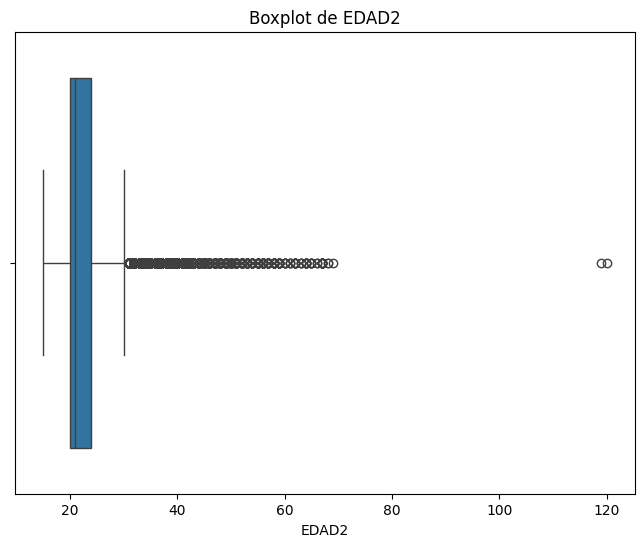

Número de valores atípicos en EDAD2: 4481


In [ ]:
# Anlisis de valores anomalos para la columna EDAD2

# Crear un boxplot para visualizar los valores anómalos en EDAD2
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_prepared['EDAD2'])
plt.title('Boxplot de EDAD2')
plt.show()

# Calcular el rango intercuartílico (IQR)
Q1 = df_prepared['EDAD2'].quantile(0.25)
Q3 = df_prepared['EDAD2'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites superior e inferior para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los valores atípicos
outliers_edad2 = df_prepared[(df_prepared['EDAD2'] < lower_bound) | (df_prepared['EDAD2'] > upper_bound)]

# Imprimir el número de valores atípicos
print(f"Número de valores atípicos en EDAD2: {len(outliers_edad2)}")


Si bien el numero de estudiantes parecen ser en su mayoria jovenes de 20-25 años, tambien hay un gran grupode estudiantes alrededor de los 35-40 años, que realmente dado su gran numero, no seria correcto consideralos anomalos, por lo que seria mejor analizar estos dos grupos de edad por separado

Aun asi existen edades por encima de los 100 años, valores que claramente son anomalos y rompen con la integridad del dataset.

In [ ]:
# Elimina filas con edades por encima de los 100 años

df_prepared = df_prepared[df_prepared['EDAD2'] <= 100]


In [ ]:
# 1. Dividir los datos en dos grupos
grupo_joven = df_prepared[df_prepared['EDAD2'] <= 25]
grupo_mayor = df_prepared[df_prepared['EDAD2'] > 25]

# 2. Cálculo de la media de cada grupo
media_joven = grupo_joven['EDAD2'].mean()
media_mayor = grupo_mayor['EDAD2'].mean()

print(f'Media del grupo joven (18-25 años): {media_joven}')
print(f'Media del grupo mayor (más de 25 años): {media_mayor}')

# 3. Realizar la prueba T para muestras independientes
t_statistic, p_value = stats.ttest_ind(grupo_joven['EDAD2'], grupo_mayor['EDAD2'], equal_var=False)

print(f'Estadística T: {t_statistic}, Valor P: {p_value}')

# 4. Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa entre los grupos.")


Media del grupo joven (18-25 años): 20.889163213120536
Media del grupo mayor (más de 25 años): 32.21446334427534
Estadística T: -158.85862900060937, Valor P: 0.0
Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos.


<ipython-input-110-7ef285df6388>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prepared['Grupo'] = np.where(df_prepared['EDAD2'] <= 25, 'Jovenes', 'Mayores')
<ipython-input-110-7ef285df6388>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Grupo', y='EDAD2', data=df_prepared, palette='pastel')


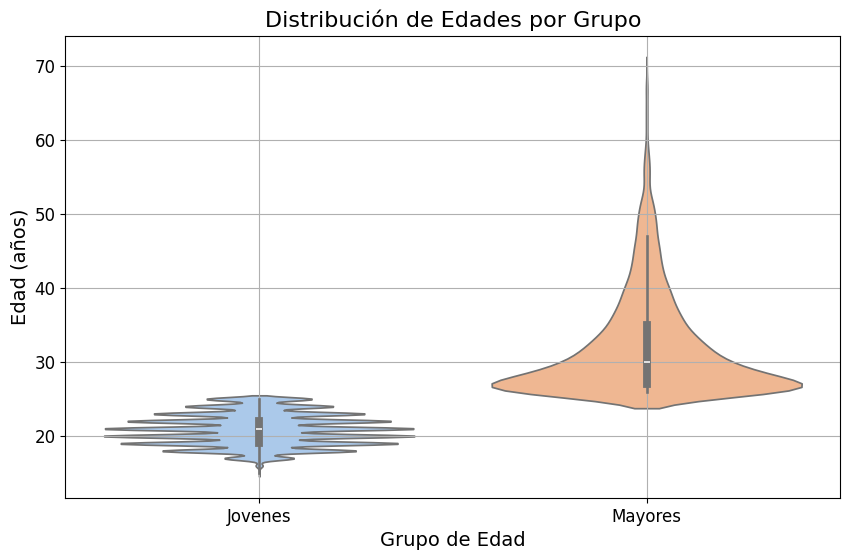

In [ ]:
# Agregamos una columna 'Grupo' al DataFrame para diferenciarlos
df_prepared['Grupo'] = np.where(df_prepared['EDAD2'] <= 25, 'Jovenes', 'Mayores')

# Gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='Grupo', y='EDAD2', data=df_prepared, palette='pastel')

# Configuración del gráfico
plt.title('Distribución de Edades por Grupo', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=14)
plt.ylabel('Edad (años)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.grid()
plt.show()

Dividir a los estudiantes en los grupos de 18 a 25 años y aquellos mayores de 25 años permite analizar conjuntos más uniformes y homogéneos. Esta segmentación facilita la identificación de patrones y tendencias específicas dentro de cada grupo, lo que resulta en un análisis más claro y efectivo

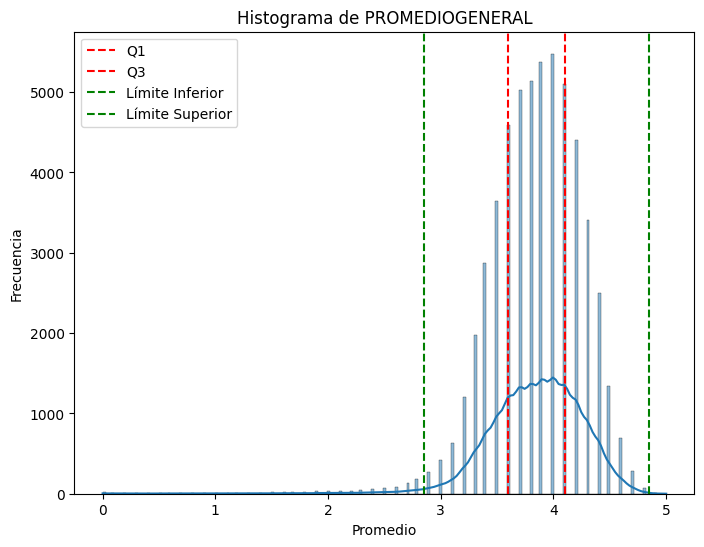

Número de valores atípicos en PROMEDIOGENERAL: 974


In [ ]:
# Anlisis de valores anomalos para la columna PROMEDIO general como un histograma con lineas en los quartiles e improme la cantidad de anomalos

# Analisis de valores anomalos para la columna PROMEDIOGENERAL
plt.figure(figsize=(8, 6))
sns.histplot(df_prepared['PROMEDIOGENERAL'], kde=True)
plt.title('Histograma de PROMEDIOGENERAL')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')

# Calcular quartiles
Q1 = df_prepared['PROMEDIOGENERAL'].quantile(0.25)
Q3 = df_prepared['PROMEDIOGENERAL'].quantile(0.75)
IQR = Q3 - Q1

# Límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Agregar líneas verticales en los quartiles
plt.axvline(Q1, color='red', linestyle='--', label='Q1')
plt.axvline(Q3, color='red', linestyle='--', label='Q3')
plt.axvline(lower_bound, color='green', linestyle='--', label='Límite Inferior')
plt.axvline(upper_bound, color='green', linestyle='--', label='Límite Superior')
plt.legend()

plt.show()


# Identificar valores atípicos
outliers_promediogeneral = df_prepared[(df_prepared['PROMEDIOGENERAL'] < lower_bound) | (df_prepared['PROMEDIOGENERAL'] > upper_bound)]

# Imprimir el número de valores atípicos
print(f"Número de valores atípicos en PROMEDIOGENERAL: {len(outliers_promediogeneral)}")


## **3.1.3. Conversión de Variables Categóricas a Numéricas**

Las variables categóricas se convertirán en numéricas utilizando la codificación ordinal o dummy, según corresponda.

In [ ]:
# Conversión de variables categóricas a numéricas
df_prepared['PROGRAMA'] = df_prepared['PROGRAMA'].astype('category').cat.codes
df_prepared['ESTADOCIVIL'] = df_prepared['ESTADOCIVIL'].astype('category').cat.codes
df_prepared['CIUDADRESIDENCIA'] = df_prepared['CIUDADRESIDENCIA'].astype('category').cat.codes
df_prepared['SITUACION_DEL_PERIODO'] = df_prepared['SITUACION_DEL_PERIODO'].astype('category').cat.codes
df_prepared['Grupo'] = df_prepared['Grupo'].astype('category').cat.codes

# Separar situacion actual dependiendo de si tiene "EXCLUIDO" en el nombre (Desertado por alguna razón) o no lo tiene
df_prepared['SITUACION_ACTUAL'] = df_prepared['SITUACION_ACTUAL'].apply(lambda x: 1 if "EXCLUIDO" in x else 0)

## **3.1.4. Normalización de Datos**

Finalmente, se normalizarán las variables numéricas para que todas estén en la misma escala.

In [ ]:
scaler = StandardScaler()
numerical_columns = ['PROMEDIOGENERAL', 'PROMEDIOSEMESTRE', 'EDAD2', 'ESTRATO', 'SEMESTRE']
df_prepared[numerical_columns] = scaler.fit_transform(df_prepared[numerical_columns])


# **4. Primera prueba modeo de predicción**

Se realizará una primera versión simple de un modelo de predicciń para ver cuales variables de las seleccionadas influyen mas en la situacion actual del estudiante (desertado por algun motivo o activo)

In [ ]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_prepared.drop('SITUACION_ACTUAL', axis=1)
y = df_prepared['SITUACION_ACTUAL']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred))

# Obtener la importancia de las variables
importance = model.coef_[0]

# Crear un DataFrame con la importancia de las variables
feature_importance = pd.DataFrame({'Variable': X.columns, 'Importancia': importance})

# Ordenar el DataFrame por importancia
feature_importance = feature_importance.sort_values('Importancia', ascending=False)

# Mostrar la importancia de las variables
print("\nImportancia de las variables:")
print(feature_importance)


Precisión del modelo: 0.6753879465896788
              precision    recall  f1-score   support

           0       0.62      0.46      0.53      4352
           1       0.70      0.81      0.75      6732

    accuracy                           0.68     11084
   macro avg       0.66      0.64      0.64     11084
weighted avg       0.67      0.68      0.66     11084


Importancia de las variables:
                Variable  Importancia
5               SEMESTRE     0.540240
1       PROMEDIOSEMESTRE     0.446433
9                  Grupo     0.249379
6                ESTRATO     0.243583
8                  EDAD2     0.167139
4       CIUDADRESIDENCIA     0.000614
0               PROGRAMA    -0.016486
3            ESTADOCIVIL    -0.051546
2        PROMEDIOGENERAL    -0.305593
7  SITUACION_DEL_PERIODO    -0.818600


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Podemos ver que la Situación del periodo (Estar o no en prueba academica), el semestre en el cual se encuentra el estudiante, y su promedio del ultimo semestre y promedio general son los factores que se correlacionan mas fuertemente con la decision de desertar o no de los estudiantes.